In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, classification_report,roc_auc_score, RocCurveDisplay)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [33]:
# Load dataset
df = pd.read_csv("heart.csv")

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [35]:
df.shape

(1025, 14)

In [36]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [37]:
#missing_values
df = pd.read_csv("heart.csv")
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Dataset shape: (1025, 14)
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


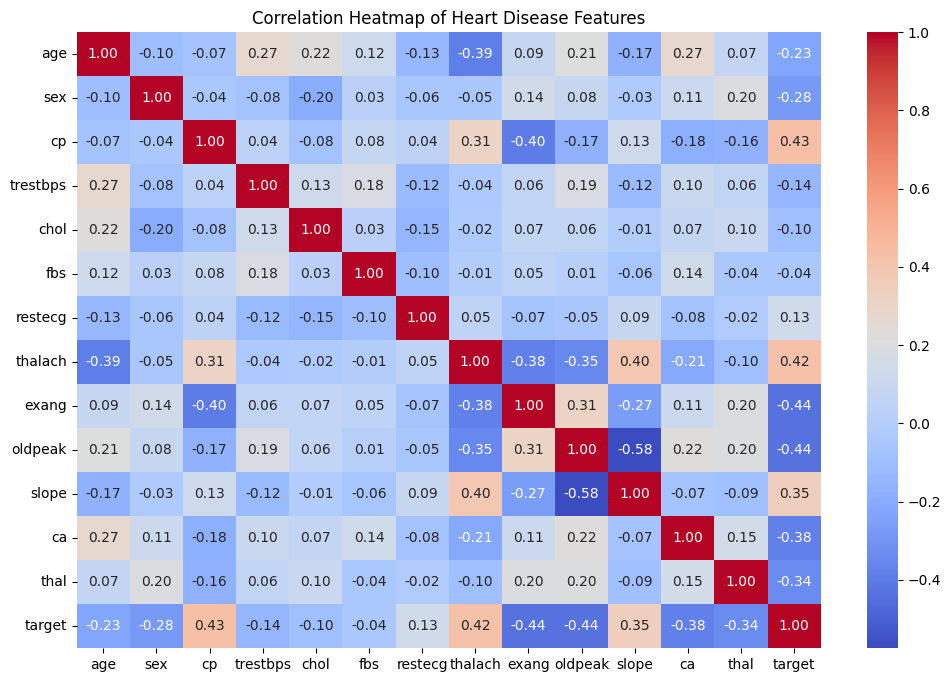

In [38]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

In [39]:
# Select first 7 columns + target
pairplot_df = df.iloc[:, :7].copy()
pairplot_df["target"] = df["target"]

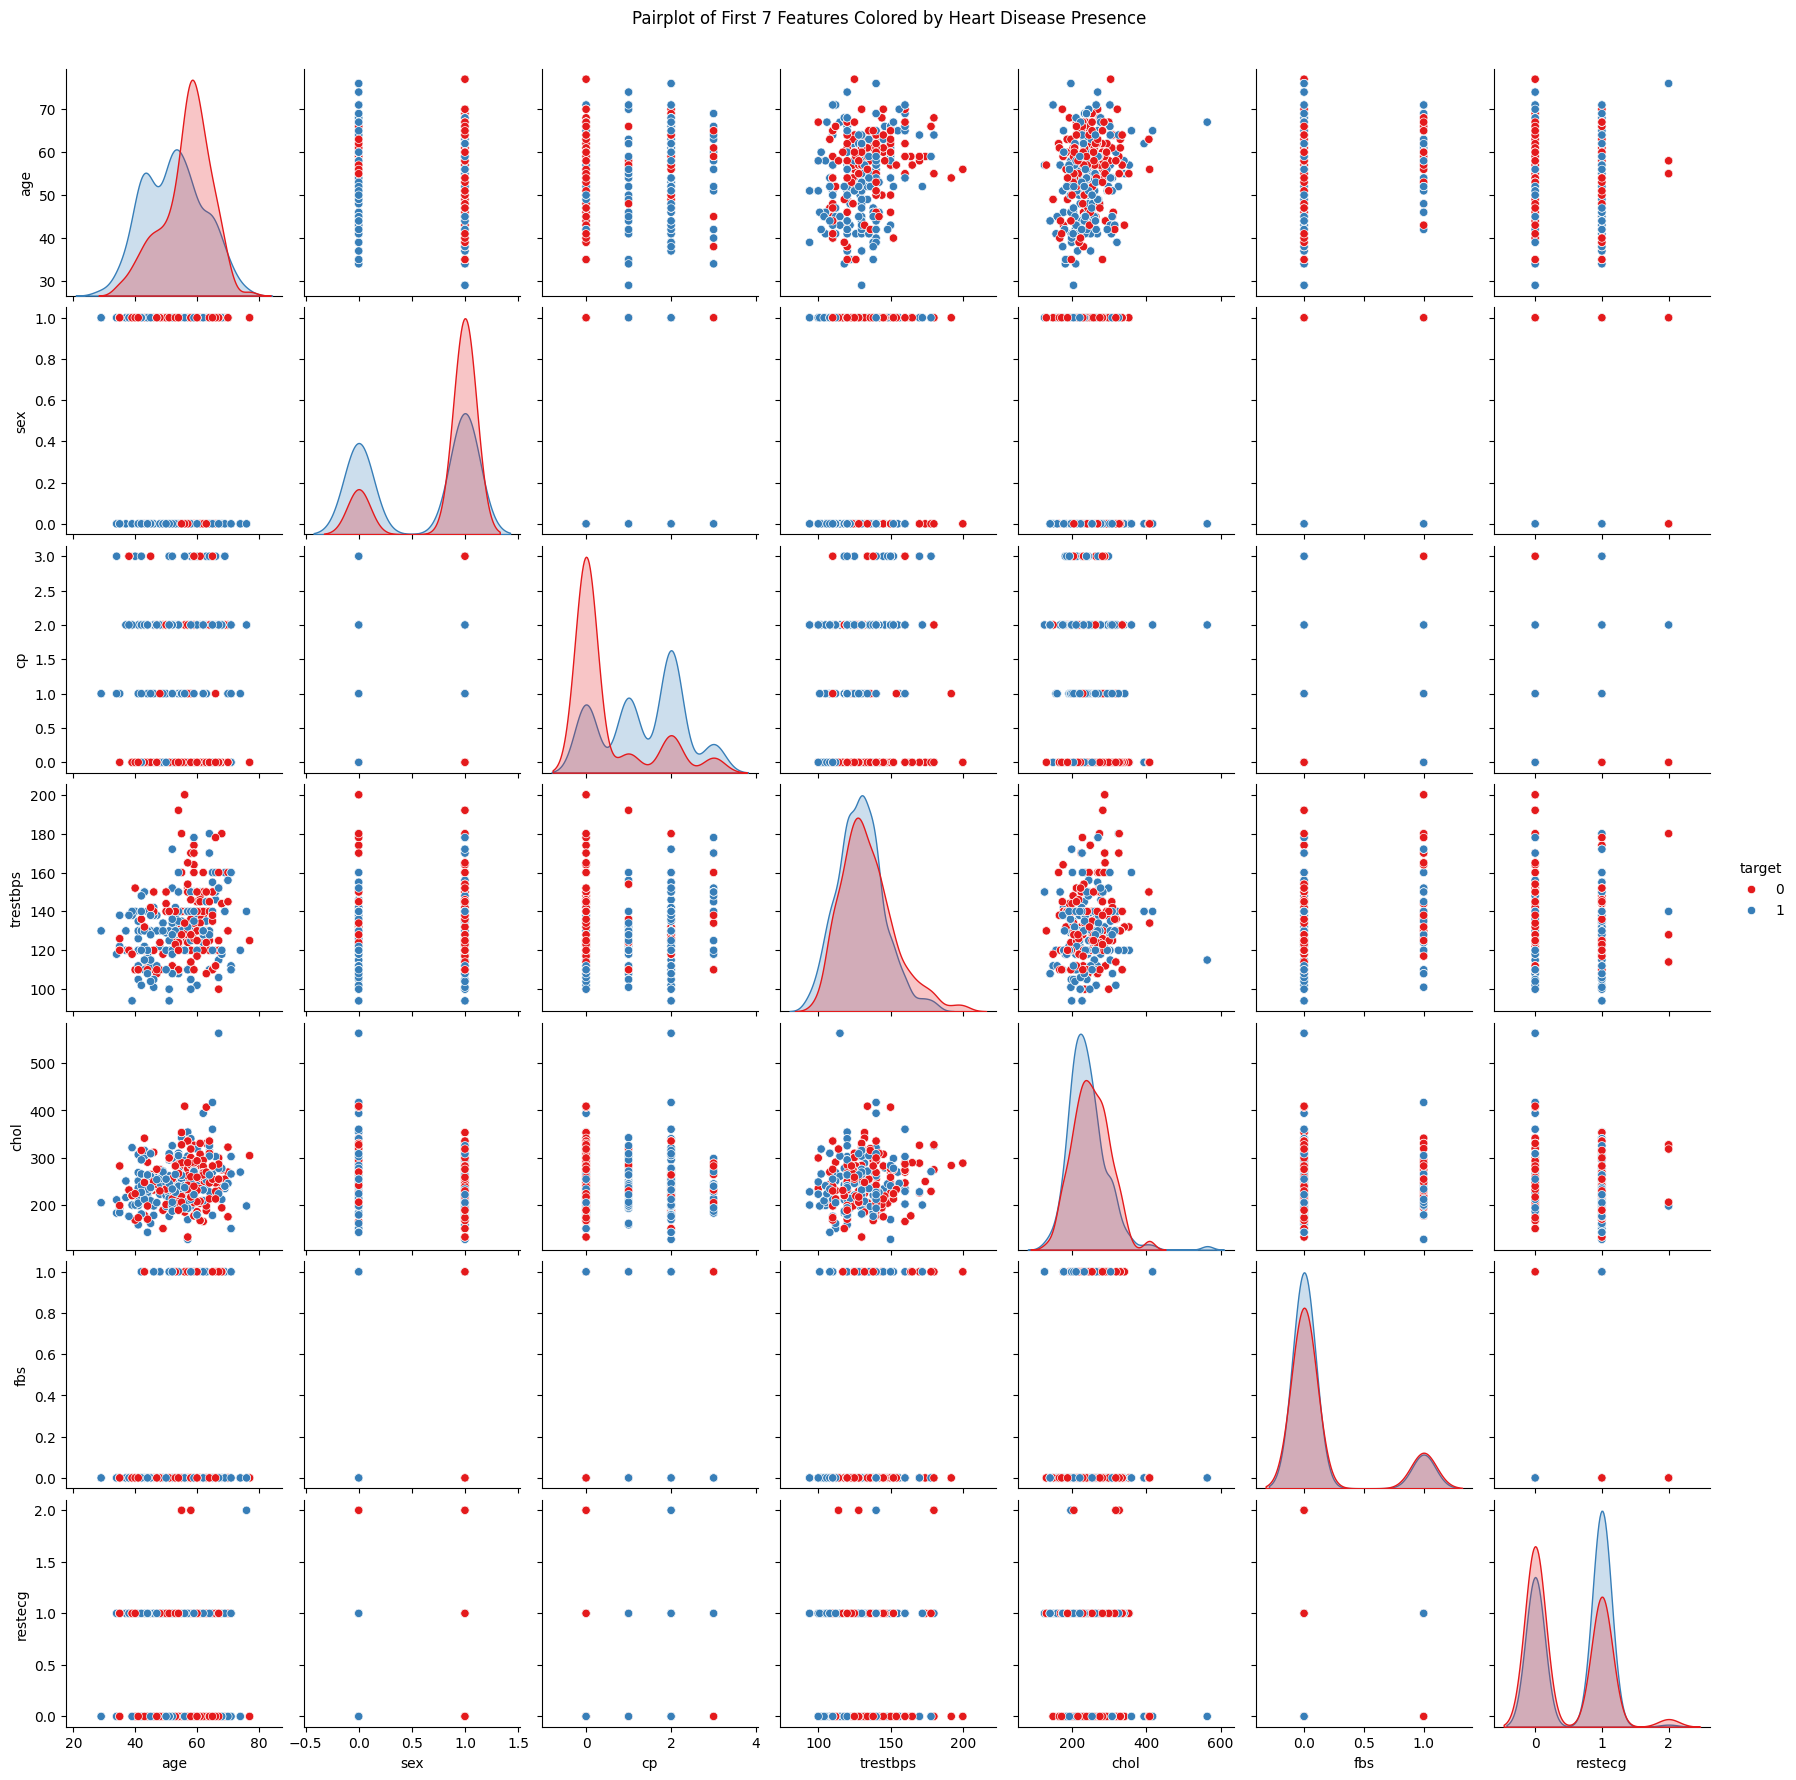

In [40]:
# Create pairplot
sns.pairplot(pairplot_df, hue="target", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of First 7 Features Colored by Heart Disease Presence", y=1.02)
plt.show()

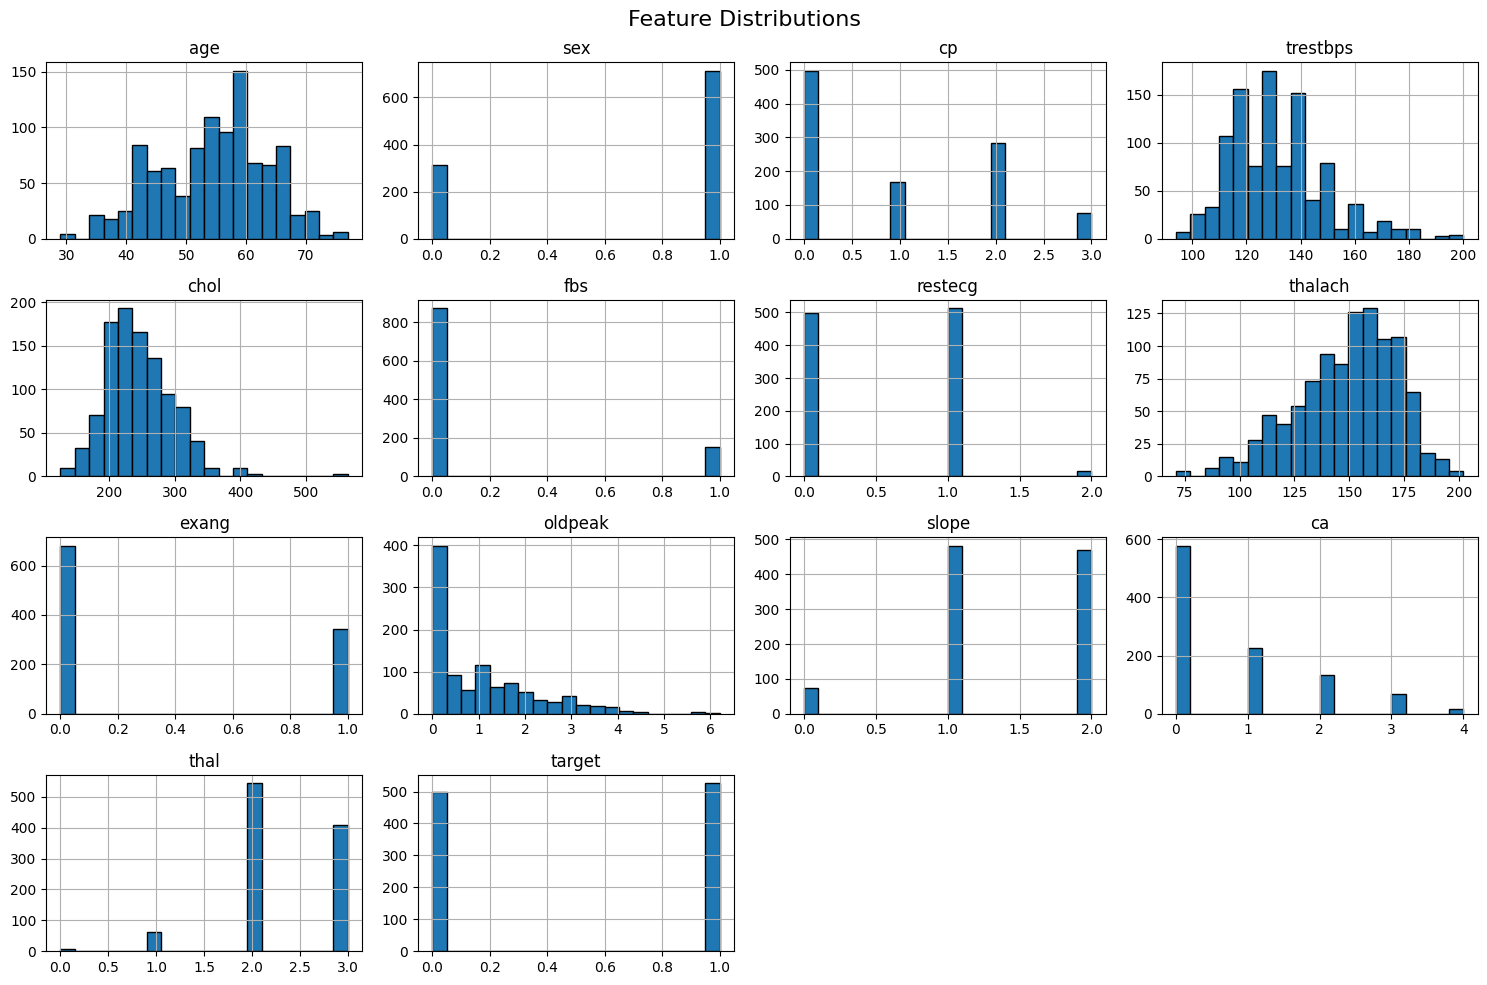

In [41]:
# Histograms
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
# === 4. Feature Scaling and Selection ===
X = df.drop("target", axis=1)
y = df["target"]

In [43]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [44]:
# Feature selection (proxy for Jellyfish Optimization)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Top 10 Selected Features:", selected_features)


Top 10 Selected Features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [45]:
# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [46]:
# === 6. Define Models ===
models = {
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    }

In [47]:
# === 7. Training and Evaluation ===
for name, model in models.items():
    print("=" * 60)
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

Model: SVM
Model: Decision Tree
Model: Random Forest
Model: AdaBoost
Model: Logistic Regression
Model: K-Nearest Neighbors


In [48]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: SVM
Accuracy: 0.8603896103896104
F1 Score: 0.8626198083067093
ROC AUC: 0.9403148875100249
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       159
           1       0.82      0.91      0.86       149

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308


Model: Decision Tree
Accuracy: 0.9707792207792207
F1 Score: 0.9688581314878892
ROC AUC: 0.9697986577181208
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308


Model: Random Forest
Accuracy: 0.9805194805194806
F1 Score: 0.9794520547945206
ROC AUC: 0.9

In [49]:
model_metrics = [
    ["SVM", 90.60, 81.76, 86.04, 94.03],
    ["Decision Tree", 93.96, 100.00, 97.08, 96.98],
    ["Random Forest", 97.99, 100.00, 99.03, 99.85],
    ["AdaBoost", 83.22, 86.16, 84.74, 92.64],
    ["Logistic Regression", 90.60, 72.33, 81.17, 86.74],
    ["K-Nearest Neighbors", 83.22, 81.76, 82.47, 95.00],
]

In [50]:
# Create a DataFrame
metrics_df = pd.DataFrame(model_metrics, columns=["Model", "Sensitivity", "Specificity", "Accuracy", "AUC"])

In [51]:
# Plotting parameters
metrics = ["Sensitivity", "Specificity", "Accuracy", "AUC"]
x = np.arange(len(metrics))
bar_width = 0.12

In [52]:
# Plot setup
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

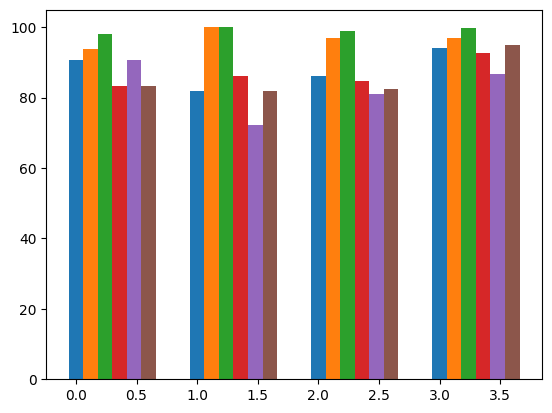

In [53]:
# Bar chart for each model
for i, row in metrics_df.iterrows():
    plt.bar(x + i * bar_width, row[metrics], width=bar_width, label=row["Model"])

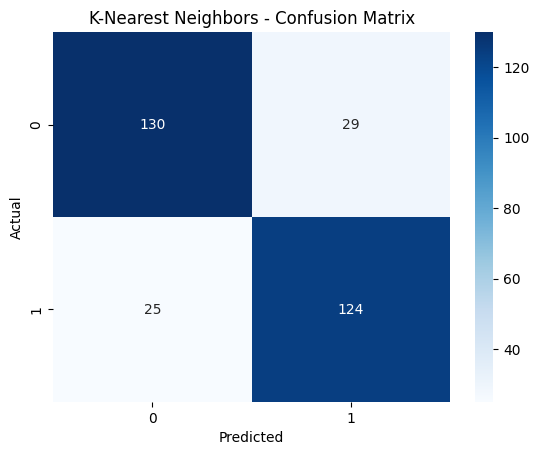

In [54]:
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

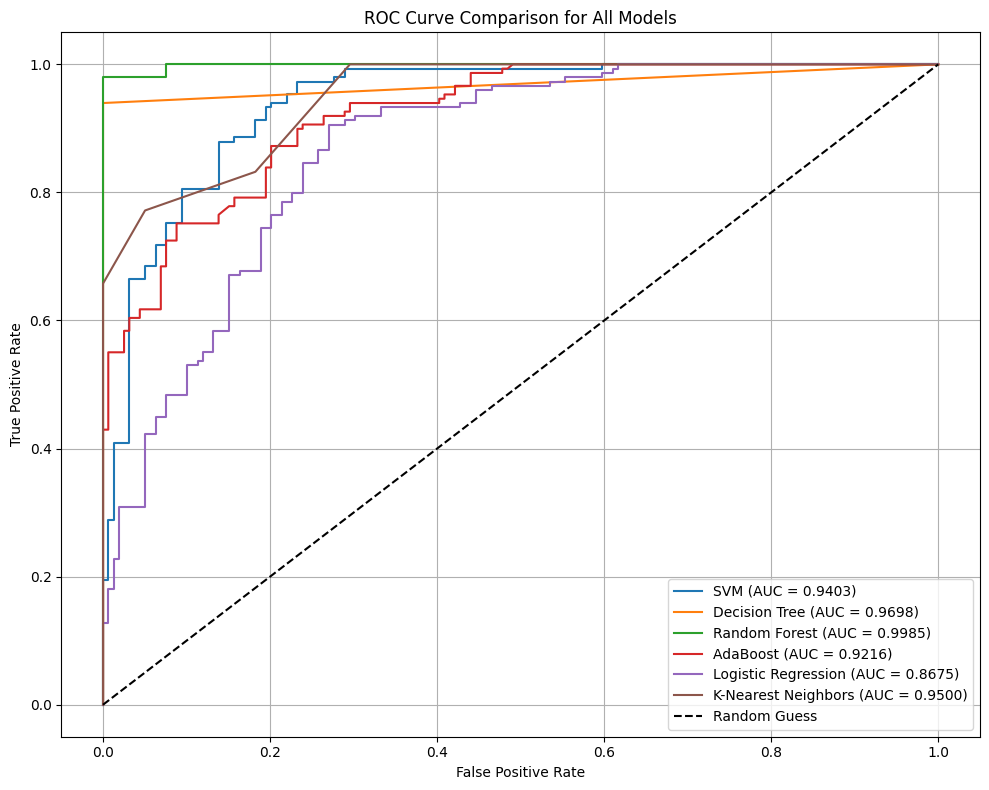

In [55]:
def plot_all_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            # Get predicted probabilities for the positive class
            y_probs = model.predict_proba(X_test)[:, 1]
            
            # Calculate AUC-ROC
            auc_score = roc_auc_score(y_test, y_probs)
            
            # Get ROC curve data
            fpr, tpr, _ = roc_curve(y_test, y_probs)
            
            # Plot ROC curve
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
    
    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
    # Formatting
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for All Models")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
plot_all_roc_curves(models, X_test, y_test)


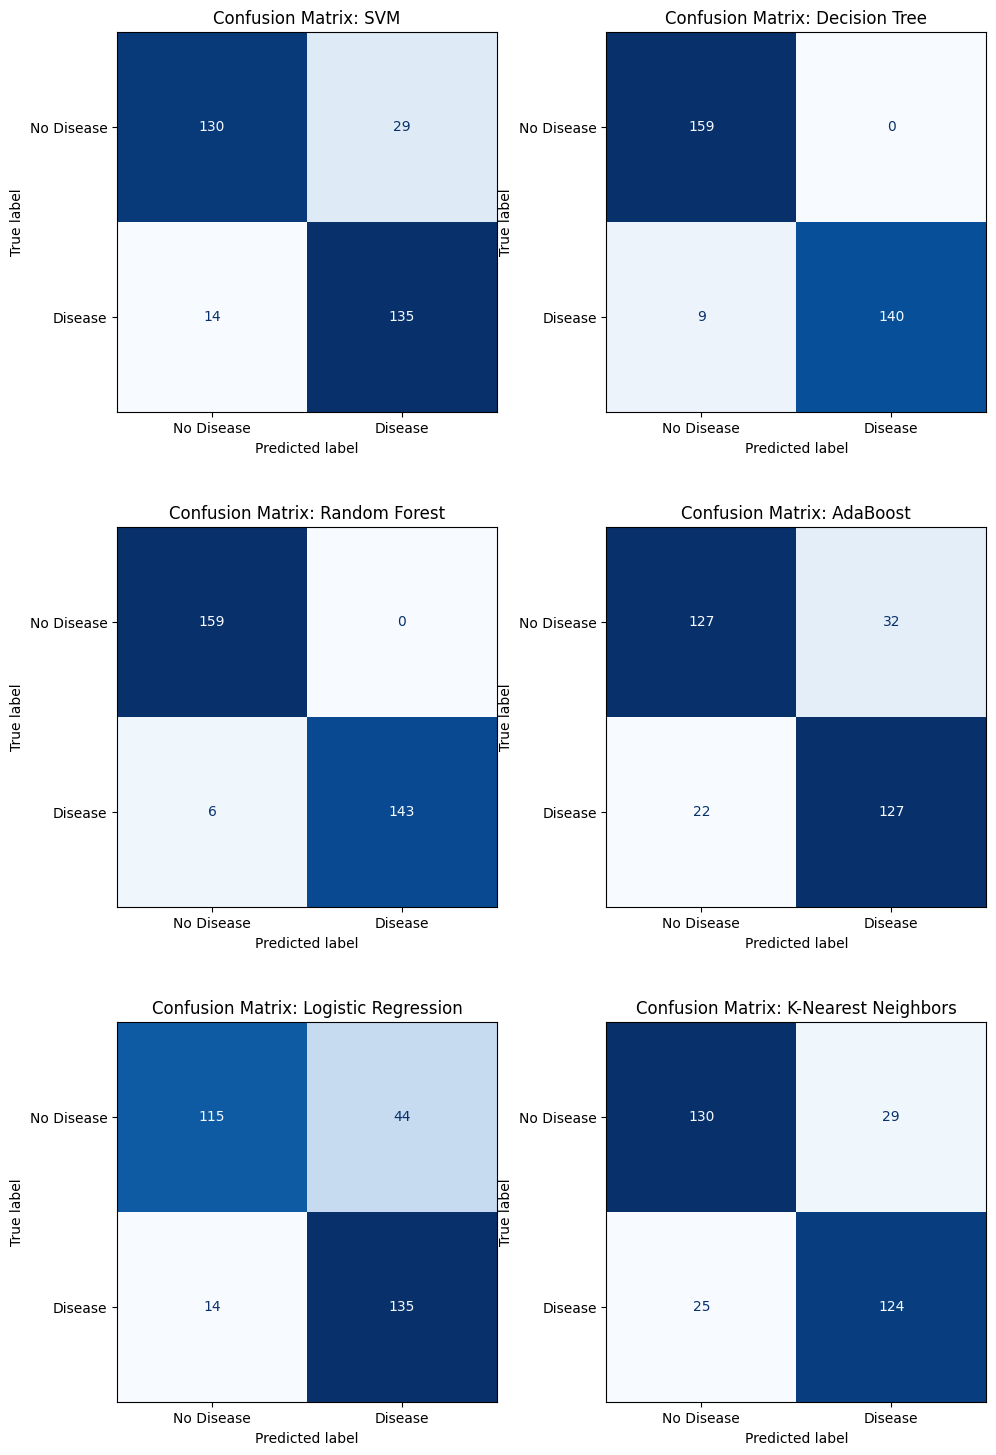

In [61]:
def plot_confusion_matrices(models, X_test, y_test):
    """
    Plot confusion matrices for each model in a grid layout.
    """
    num_models = len(models)
    cols = 2
    rows = (num_models + 1) // cols
    
    plt.figure(figsize=(10, 5 * rows))
    
    for idx, (name, model) in enumerate(models.items()):
        plt.subplot(rows, cols, idx + 1)
        
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Plot confusion matrix
        disp = ConfusionMatrixDisplay.from_estimator(
            model, X_test, y_test,
            display_labels=["No Disease", "Disease"],
            cmap=plt.cm.Blues,
            ax=plt.gca(),
            colorbar=False
        )
        plt.title(f"Confusion Matrix: {name}")
    
    plt.tight_layout()
    plt.show()
plot_confusion_matrices(models, X_test, y_test)